In [1]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-76d0f209-a970-cb89-2423-11556093cb29)


In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("enable gpu from runtime")

Default GPU Device:/device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
dataset_url = "https://www.kaggle.com/furcifer/bangla-newspaper-dataset?select=data_v2"
import opendatasets as od

od.download(dataset_url)

100%|██████████| 1.03G/1.03G [00:18<00:00, 59.5MB/s]


In [6]:
import json 

with open("bangla-newspaper-dataset/data/data.json", encoding = "utf-8") as dt:
  data = json.load(dt) 

In [7]:
type(data)

list

In [8]:
type(data[0])

dict

In [9]:
len(data)

437948

In [10]:
data[0].keys()

dict_keys(['author', 'category', 'category_bn', 'published_date', 'modification_date', 'tag', 'comment_count', 'title', 'url', 'content'])

In [11]:
data[0]

{'author': 'গাজীপুর প্রতিনিধি',
 'category': 'bangladesh',
 'category_bn': 'বাংলাদেশ',
 'comment_count': 0,
 'content': 'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্য

In [12]:
data[0]['content']

'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল, সফিপুর মডার্ন হাসপাতাল, উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে

In [13]:
len(data[0]['content'])

1752

In [14]:
cat_set = set(a['category'] for a in data)
cat_set

{'-1',
 '22221',
 'AskEditor',
 'bangladesh',
 'bondhushava',
 'bs-events',
 'chakri-bakri',
 'demo-content',
 'diverse',
 'durporobash',
 'economy',
 'education',
 'entertainment',
 'events',
 'facebook',
 'international',
 'kishoralo',
 'life-style',
 'mpaward1',
 'nagorik-kantho',
 'northamerica',
 'onnoalo',
 'opinion',
 'pachmisheli',
 'protichinta',
 'roshalo',
 'special-supplement',
 'sports',
 'tarunno',
 'technology',
 'trust',
 'we-are'}

In [15]:
len(cat_set)

32

In [16]:
all_cat = [a['category']for a in data]

In [17]:
len(data)  == len(all_cat) , len(data)

(True, 437948)

In [18]:
from tqdm.notebook import tqdm_notebook

cat_count = []

for cat in tqdm_notebook(cat_set):
  cat_count.append(all_cat.count(cat))
cat_count

  0%|          | 0/32 [00:00<?, ?it/s]

[49012,
 123,
 232504,
 12116,
 30466,
 508,
 10852,
 17,
 75,
 10,
 2,
 11,
 859,
 1,
 443,
 2604,
 17245,
 7402,
 170,
 2,
 1,
 15699,
 83,
 990,
 9721,
 2702,
 6990,
 40,
 2999,
 3443,
 2,
 30856]

In [19]:
sorted(cat_count)[::-1]

[232504,
 49012,
 30856,
 30466,
 17245,
 15699,
 12116,
 10852,
 9721,
 7402,
 6990,
 3443,
 2999,
 2702,
 2604,
 990,
 859,
 508,
 443,
 170,
 123,
 83,
 75,
 40,
 17,
 11,
 10,
 2,
 2,
 2,
 1,
 1]

In [20]:
cat_set

{'-1',
 '22221',
 'AskEditor',
 'bangladesh',
 'bondhushava',
 'bs-events',
 'chakri-bakri',
 'demo-content',
 'diverse',
 'durporobash',
 'economy',
 'education',
 'entertainment',
 'events',
 'facebook',
 'international',
 'kishoralo',
 'life-style',
 'mpaward1',
 'nagorik-kantho',
 'northamerica',
 'onnoalo',
 'opinion',
 'pachmisheli',
 'protichinta',
 'roshalo',
 'special-supplement',
 'sports',
 'tarunno',
 'technology',
 'trust',
 'we-are'}

In [21]:
z = zip(cat_count, cat_set)
z = list(z)
z

[(49012, 'sports'),
 (123, '-1'),
 (232504, 'bangladesh'),
 (12116, 'technology'),
 (30466, 'entertainment'),
 (508, 'kishoralo'),
 (10852, 'life-style'),
 (17, 'mpaward1'),
 (75, 'chakri-bakri'),
 (10, 'facebook'),
 (2, 'demo-content'),
 (11, '22221'),
 (859, 'special-supplement'),
 (1, 'bs-events'),
 (443, 'trust'),
 (2604, 'roshalo'),
 (17245, 'economy'),
 (7402, 'durporobash'),
 (170, 'protichinta'),
 (2, 'events'),
 (1, 'AskEditor'),
 (15699, 'opinion'),
 (83, 'nagorik-kantho'),
 (990, 'bondhushava'),
 (9721, 'education'),
 (2702, 'onnoalo'),
 (6990, 'northamerica'),
 (40, 'tarunno'),
 (2999, 'we-are'),
 (3443, 'pachmisheli'),
 (2, 'diverse'),
 (30856, 'international')]

In [22]:
sel_cats = []

for i in z :
  if i[0] > 7000:
    sel_cats.append(i[1])

In [23]:
sel_cats

['sports',
 'bangladesh',
 'technology',
 'entertainment',
 'life-style',
 'economy',
 'durporobash',
 'opinion',
 'education',
 'international']

In [24]:
len(sel_cats) , len(cat_set)

(10, 32)

In [25]:
X_text = []
y_label = []

for i in data :
  if i['category'] in sel_cats:
    X_text.append(i['content'])
    y_label.append(i['category'])

In [26]:
X_text[0]

'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল, সফিপুর মডার্ন হাসপাতাল, উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে

In [27]:
y_label[0]

'bangladesh'

In [28]:
len(X_text) , len(y_label)

(415873, 415873)

In [29]:
set(y_label)

{'bangladesh',
 'durporobash',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology'}

In [30]:
sel_cats

['sports',
 'bangladesh',
 'technology',
 'entertainment',
 'life-style',
 'economy',
 'durporobash',
 'opinion',
 'education',
 'international']

In [31]:
len(set(y_label)) == len(sel_cats)

True

In [32]:
# convert the categorical labels to numeric 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

class_labels = encoder.fit_transform(y_label)

In [33]:
len(class_labels) == len(y_label)

True

In [34]:
set(class_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [35]:
encoder.inverse_transform(list(set(class_labels)))

array(['bangladesh', 'durporobash', 'economy', 'education',
       'entertainment', 'international', 'life-style', 'opinion',
       'sports', 'technology'], dtype='<U13')

In [36]:
list(zip(set(class_labels), list(encoder.inverse_transform(list(set(class_labels))))))

[(0, 'bangladesh'),
 (1, 'durporobash'),
 (2, 'economy'),
 (3, 'education'),
 (4, 'entertainment'),
 (5, 'international'),
 (6, 'life-style'),
 (7, 'opinion'),
 (8, 'sports'),
 (9, 'technology')]

In [37]:
type(class_labels) 

numpy.ndarray

In [38]:
class_labels.shape

(415873,)

In [39]:
import numpy as np
np.shape(np.reshape(class_labels, newshape=(class_labels.shape[0], 1)))

(415873, 1)

In [40]:
# apply one hot encoding to the class label for binary encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)

class_labels = class_labels.reshape((class_labels.shape[0],1))
y_ohe = encoder.fit_transform(class_labels)

In [41]:
y_ohe.shape

(415873, 10)

In [42]:
y_ohe[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [43]:
class_labels[1]

array([8])

## tokenize the texts input to convert tokens to numeric


In [44]:
X_text[0]

'গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায় আজ বৃহস্পতিবার রাতের টিফিন খেয়ে একটি পোশাক কারখানার ৫০০ শ্রমিক অসুস্থ হয়ে পড়েছেন। এ ঘটনায় বিক্ষোভ করেছেন ওই কারখানার শ্রমিকেরা।সফিপুর মডার্ন হাসপাতালের জরুরি বিভাগের চিকিত্সক আল আমিন প্রথম আলো ডটকমকে বলেন, খাদ্যে বিষক্রিয়ায় তাঁরা (শ্রমিকেরা) অসুস্থ হয়ে পড়েছেন। এতে আতঙ্কিত হওয়ার কিছু নেই। অসুস্থদের চিকিত্সা দেওয়া হয়েছে।কারখানার শ্রমিক ও পুলিশ সূত্রে জানা যায়, উপজেলার তেলিরচালা এলাকার সেজাদ সোয়েটার লিমিটেড কারখানার শ্রমিকদের আজ রাত সাড়ে সাতটার দিকে টিফিন দেওয়া হয়। টিফিনে ছিল ডিম, রুটি, পেটিস ও কলা। টিফিন খেয়ে শ্রমিকেরা যথারীতি কাজে যোগ দেন। ওই টিফিন খাওয়ার প্রায় এক ঘণ্টা পর রাত সাড়ে আটটার দিকে কয়েকজন শ্রমিকের বমি ও পেট ব্যথা শুরু হয়। এরপর ধীরে ধীরে পুরো কারখানার শ্রমিকেরা অসুস্থ হতে থাকে। অনেকেই কারখানার মেঝেতে ঢলে পড়ে। এতে পাঁচ শতাধিক শ্রমিক অসুস্থ হয়ে পড়ে।পরে কারখানা কর্তৃপক্ষ দ্রুত যানবাহনের ব্যবস্থা করে তাদের সফিপুর জেনারেল হাসপাতাল, সফিপুর মডার্ন হাসপাতাল, উপজেলা স্বাস্থ্য কমপ্লেক্সসহ বিভিন্ন ক্লিনিকে ভর্তি করে

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text) # Only words known by the tokenizer will be taken into account
X_token = tokenizer.texts_to_sequences(X_text) # Transforms each text in texts to a sequence of integers


In [46]:
type(tokenizer.word_index)

dict

In [47]:
for index, token  in enumerate(tokenizer.word_index):
  print(token)
  if index == 10:
    break


ও
এ
থেকে
করে
করা
বলেন
এই
না
জন্য
তিনি
সঙ্গে


In [48]:
vocab_size = len(tokenizer.word_index)+1 
vocab_size

2497356

In [49]:
tokenizer.texts_to_sequences(["আমার নাম ফয়সাল"])

[[83, 157, 18543]]

In [50]:
print(X_text[5])
print(X_token[5])

গুগলের মোবাইল অপারেটিং সিস্টেম অ্যান্ড্রয়েডের বড় ধরনের ত্রুটির খোঁজ পেয়েছেন বলে দাবি করেছেন যুক্তরাষ্ট্রের প্রযুক্তি নিরাপত্তা গবেষণা প্রতিষ্ঠান ব্লুবক্সের গবেষকেরা। গবেষকেরা বলছেন, অ্যান্ড্রয়েডের দুর্বলতা বা বাগ হিসেবে একটি ‘মাস্টার কী’-এর খোঁজ পেয়েছেন তাঁরা। এ সফটওয়্যার ত্রুটির কারণে সাইবার অপরাধীরা অ্যান্ড্রয়েড স্মার্টফোন থেকে তথ্য চুরি করতে পারে। এক খবরে এ তথ্য জানিয়েছে বিবিসি অনলাইন। গবেষকেদের দাবি, অ্যান্ড্রয়েড সফটওয়্যারের এই ত্রুটি ২০০৯ সালের পর থেকে উন্মুক্ত সব সংস্করণেই রয়েছে। ক্রিপটোগ্রাফিক ভেরিফিকেশন প্রক্রিয়ার দুর্বলতার কারণেই অ্যান্ড্রয়েডে অতিরিক্ত ম্যালওয়্যারের আক্রমণ দেখা যায়। ক্রিপটোগ্রাফিক ভেরিফিকেশন প্রক্রিয়ার মাধ্যমে বিভিন্ন অ্যাপ্লিকেশন পরীক্ষা করে দেখা হয়।  চলতি বছরের আগস্ট মাসে অনুষ্ঠিতব্য ব্ল্যাক হ্যাক হ্যাকারস সম্মেলনে অ্যান্ড্রয়েডের এ ত্রুটির বিস্তারিত জানানোর কথা জানিয়েছেন গবেষকেরা। অ্যান্ড্রয়েডের সফটওয়্যার ত্রুটির বিষয়ে গুগল কর্তৃপক্ষ আনুষ্ঠানিকভাবে কোনো মন্তব্য করেনি।
[5200, 1280, 4961, 4314, 45265, 529, 159, 9617, 2182, 5273, 27, 131, 

In [51]:
for i in "আমার নাম ফয়সাল":
  print(i)

আ
ম
া
র
 
ন
া
ম
 
ফ
য
়
স
া
ল


In [52]:
len("আমার নাম ফয়সাল")

15

In [53]:
len(X_text[5]) , len(X_token[5]) 

(930, 114)

In [54]:
if "ফয়সাল" in tokenizer.word_index:
  print(tokenizer.word_index["ফয়সাল"])

18543


In [55]:
tokenizer.sequences_to_texts([X_token[5]])

['গুগলের মোবাইল অপারেটিং সিস্টেম অ্যান্ড্রয়েডের বড় ধরনের ত্রুটির খোঁজ পেয়েছেন বলে দাবি করেছেন যুক্তরাষ্ট্রের প্রযুক্তি নিরাপত্তা গবেষণা প্রতিষ্ঠান ব্লুবক্সের গবেষকেরা। গবেষকেরা বলছেন অ্যান্ড্রয়েডের দুর্বলতা বা বাগ হিসেবে একটি ‘মাস্টার কী’ এর খোঁজ পেয়েছেন তাঁরা। এ সফটওয়্যার ত্রুটির কারণে সাইবার অপরাধীরা অ্যান্ড্রয়েড স্মার্টফোন থেকে তথ্য চুরি করতে পারে। এক খবরে এ তথ্য জানিয়েছে বিবিসি অনলাইন।\xa0গবেষকেদের দাবি অ্যান্ড্রয়েড সফটওয়্যারের এই ত্রুটি ২০০৯ সালের পর থেকে উন্মুক্ত সব সংস্করণেই রয়েছে। ক্রিপটোগ্রাফিক ভেরিফিকেশন প্রক্রিয়ার দুর্বলতার কারণেই অ্যান্ড্রয়েডে অতিরিক্ত ম্যালওয়্যারের আক্রমণ দেখা যায়। ক্রিপটোগ্রাফিক ভেরিফিকেশন প্রক্রিয়ার মাধ্যমে বিভিন্ন অ্যাপ্লিকেশন পরীক্ষা করে দেখা হয়। \xa0চলতি বছরের আগস্ট মাসে অনুষ্ঠিতব্য ব্ল্যাক হ্যাক হ্যাকারস সম্মেলনে অ্যান্ড্রয়েডের এ ত্রুটির বিস্তারিত জানানোর কথা জানিয়েছেন গবেষকেরা।\xa0অ্যান্ড্রয়েডের সফটওয়্যার ত্রুটির বিষয়ে গুগল কর্তৃপক্ষ আনুষ্ঠানিকভাবে কোনো মন্তব্য করেনি।']

## pad the sequences


In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 300

X_pad = pad_sequences(X_token, padding = "post", maxlen = maxlen)



In [57]:
X_pad.shape

(415873, 300)

In [58]:
y_ohe.shape

(415873, 10)

In [59]:
vocab_size

2497356

In [60]:
maxlen

300

In [61]:
X_pad[0]

array([  2423,  17699,     97,  84743,    862,     62,    243,   2294,
        17904,   9439,     14,   1042,   1570,   1125,    671,   1702,
          363,  12546,      2,   1225,   1366,    111,     26,   1570,
       819364,  17721,    639,   1131,    224,  10265,    425,   1327,
           24,    729,   6338,      6,  11512,  66741,     69,   2397,
         1702,    363,  12546,    110,   7557,   1160,     63,    142,
        97133,   9903,    403, 217932,    671,      1,     60,    394,
          147,    890,     97,  84743,    228, 355379,  45492,   2482,
         1570,   1457,     62,    261,    848,   3270,     74,  17904,
          403,    230,  78381,     49,   3253,   8881, 131797,      1,
        84744,  17904,   9439,   2397,   8553,    462,    629,    246,
           26,  17904,  11809,    853,     13,    670,     22,    261,
          848,   2049,     74,   2415,   3564,   9503,      1,   7770,
         3051,     48,    230,    207,   1550,   1550,    694,   1570,
      

In [62]:
len(X_token[0]) , len(X_pad[0])

(258, 300)

In [63]:
unique, counts = np.unique(X_pad[0] , return_counts=True)
padded_zeros = dict(zip(unique, counts))[0]

In [64]:
len(X_pad[0]) - len(X_token[0]) 

42

In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
embedding_dim = 8

model = Sequential(name = "bidirectional_lstm")
model.add(Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim, 
    input_length= maxlen
))

model.add(Bidirectional(CuDNNLSTM(128, return_sequences = True)))
model.add(Bidirectional(CuDNNLSTM(128)))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model.summary()


Model: "bidirectional_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 8)            19978848  
                                                                 
 bidirectional (Bidirectiona  (None, 300, 256)         141312    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              395264    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
Total params: 20,517,994
Trainable params: 20,517,994
Non-trainable params: 0
_________________________________________________________________


In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 2, test_size=0.3, random_state=42)
sss.get_n_splits(X_pad, y_ohe)


2

In [67]:
for train_index, test_index in sss.split(X_pad, y_ohe):
    X_train, X_test = X_pad[train_index], X_pad[test_index]
    y_train, y_test = y_ohe[train_index], y_ohe[test_index]

In [68]:
bi_lstm_history = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=64
                   )

Epoch 1/5
3639/3639 [==============================] - 298s 79ms/step - loss: 0.6184 - accuracy: 0.8100 - val_loss: 0.3455 - val_accuracy: 0.8947
Epoch 2/5
3639/3639 [==============================] - 291s 80ms/step - loss: 0.2427 - accuracy: 0.9251 - val_loss: 0.2454 - val_accuracy: 0.9245
Epoch 3/5
3639/3639 [==============================] - 290s 80ms/step - loss: 0.1286 - accuracy: 0.9601 - val_loss: 0.2468 - val_accuracy: 0.9283
Epoch 4/5
3639/3639 [==============================] - 298s 82ms/step - loss: 0.0682 - accuracy: 0.9787 - val_loss: 0.2538 - val_accuracy: 0.9284
Epoch 5/5
3639/3639 [==============================] - 293s 80ms/step - loss: 0.0370 - accuracy: 0.9885 - val_loss: 0.3125 - val_accuracy: 0.9225


In [69]:
bi_lstm_history.params

{'epochs': 5, 'steps': 3639, 'verbose': 1}

In [70]:
bi_lstm_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

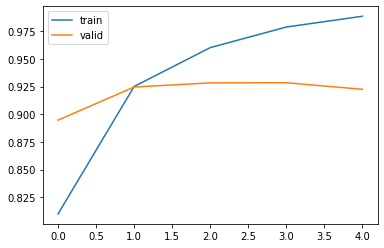

In [71]:
import matplotlib.pyplot as plt

plt.plot(bi_lstm_history.history['accuracy'])
plt.plot(bi_lstm_history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()


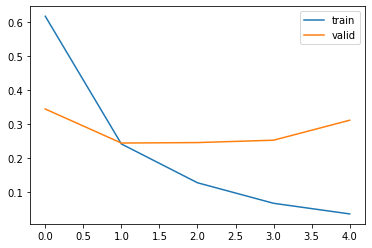

In [72]:
plt.plot(bi_lstm_history.history['loss'])
plt.plot(bi_lstm_history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

In [73]:
# mount gdrive
saving_dir = "drive/MyDrive/DL_models/bangla-news-rnn/"

In [74]:
model_save_name = "bi-lstm-model.h5"

saving_path =saving_dir+model_save_name
saving_path

'drive/MyDrive/DL_models/bangla-news-rnn/bi-lstm-model.h5'

In [75]:
model.save(saving_path)

In [76]:
## LSTM model

model_lstm = Sequential(name = "lstm")
model_lstm.add(Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim, 
    input_length= maxlen
))

model_lstm.add(CuDNNLSTM(128, return_sequences = True))
model_lstm.add(CuDNNLSTM(128))
model_lstm.add(Dense(10,activation = 'softmax'))
model_lstm.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model_lstm.summary()


Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 8)            19978848  
                                                                 
 cu_dnnlstm_2 (CuDNNLSTM)    (None, 300, 128)          70656     
                                                                 
 cu_dnnlstm_3 (CuDNNLSTM)    (None, 128)               132096    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 20,182,890
Trainable params: 20,182,890
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.summary()

Model: "bidirectional_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 8)            19978848  
                                                                 
 bidirectional (Bidirectiona  (None, 300, 256)         141312    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              395264    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
Total params: 20,517,994
Trainable params: 20,517,994
Non-trainable params: 0
_________________________________________________________________


In [78]:
lstm_history = model_lstm.fit(X_train, y_train,
                    epochs=10,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=64
                   )

Epoch 1/10
3639/3639 [==============================] - 158s 43ms/step - loss: 1.2113 - accuracy: 0.6434 - val_loss: 0.7890 - val_accuracy: 0.7511
Epoch 2/10
3639/3639 [==============================] - 164s 45ms/step - loss: 0.5783 - accuracy: 0.8168 - val_loss: 0.4425 - val_accuracy: 0.8622
Epoch 3/10
3639/3639 [==============================] - 155s 43ms/step - loss: 0.3216 - accuracy: 0.9009 - val_loss: 0.3254 - val_accuracy: 0.9024
Epoch 4/10
3639/3639 [==============================] - 155s 42ms/step - loss: 0.1886 - accuracy: 0.9421 - val_loss: 0.2894 - val_accuracy: 0.9123
Epoch 5/10
3639/3639 [==============================] - 155s 43ms/step - loss: 0.1170 - accuracy: 0.9645 - val_loss: 0.3329 - val_accuracy: 0.9028
Epoch 6/10
3639/3639 [==============================] - 163s 45ms/step - loss: 0.0751 - accuracy: 0.9773 - val_loss: 0.3536 - val_accuracy: 0.9051
Epoch 7/10
3639/3639 [==============================] - 156s 43ms/step - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0

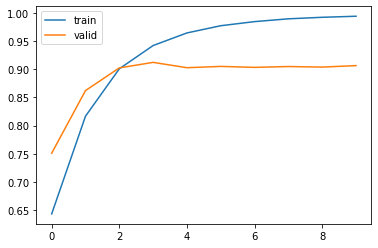

In [79]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()


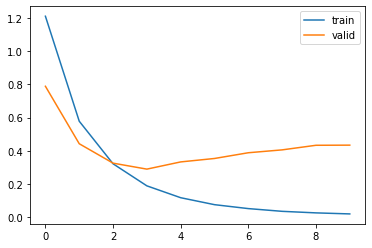

In [80]:
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

In [81]:
model_lstm_save_name = "lstm-model.h5"

saving_path_lstm =saving_dir+model_lstm_save_name
saving_path_lstm

'drive/MyDrive/DL_models/bangla-news-rnn/lstm-model.h5'

In [82]:
model_lstm.save(saving_path_lstm)

In [83]:
## GRU model
from tensorflow.keras.layers import GRU

model_gru = Sequential(name = "gru")
model_gru.add(Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim, 
    input_length= maxlen
))

model_gru.add(GRU(128, return_sequences = True))
model_gru.add(GRU(128))
model_gru.add(Dense(10,activation = 'softmax'))
model_gru.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])
model_gru.summary()

Model: "gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 8)            19978848  
                                                                 
 gru (GRU)                   (None, 300, 128)          52992     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 20,132,202
Trainable params: 20,132,202
Non-trainable params: 0
_________________________________________________________________


In [84]:
gru_history = model_gru.fit(X_train, y_train,
                    epochs=5,
                    verbose=1,
                    validation_split=0.2,
                    batch_size=64
                   )

Epoch 1/5
3639/3639 [==============================] - 163s 44ms/step - loss: 0.5686 - accuracy: 0.8252 - val_loss: 0.2869 - val_accuracy: 0.9124
Epoch 2/5
3639/3639 [==============================] - 161s 44ms/step - loss: 0.1927 - accuracy: 0.9411 - val_loss: 0.2426 - val_accuracy: 0.9242
Epoch 3/5
3639/3639 [==============================] - 163s 45ms/step - loss: 0.0939 - accuracy: 0.9707 - val_loss: 0.2536 - val_accuracy: 0.9250
Epoch 4/5
3639/3639 [==============================] - 161s 44ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.2818 - val_accuracy: 0.9260
Epoch 5/5
3639/3639 [==============================] - 159s 44ms/step - loss: 0.0228 - accuracy: 0.9929 - val_loss: 0.3284 - val_accuracy: 0.9240


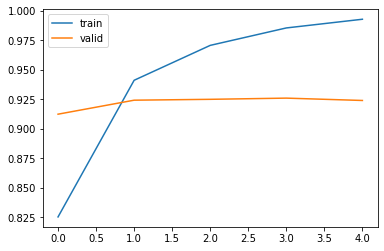

In [85]:
import matplotlib.pyplot as plt

plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.legend(['train', 'valid'])
plt.show()

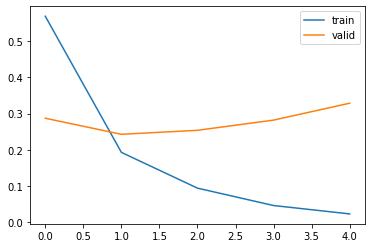

In [86]:
import matplotlib.pyplot as plt

plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.legend(['train', 'valid'])
plt.show()

## Plotting all data 

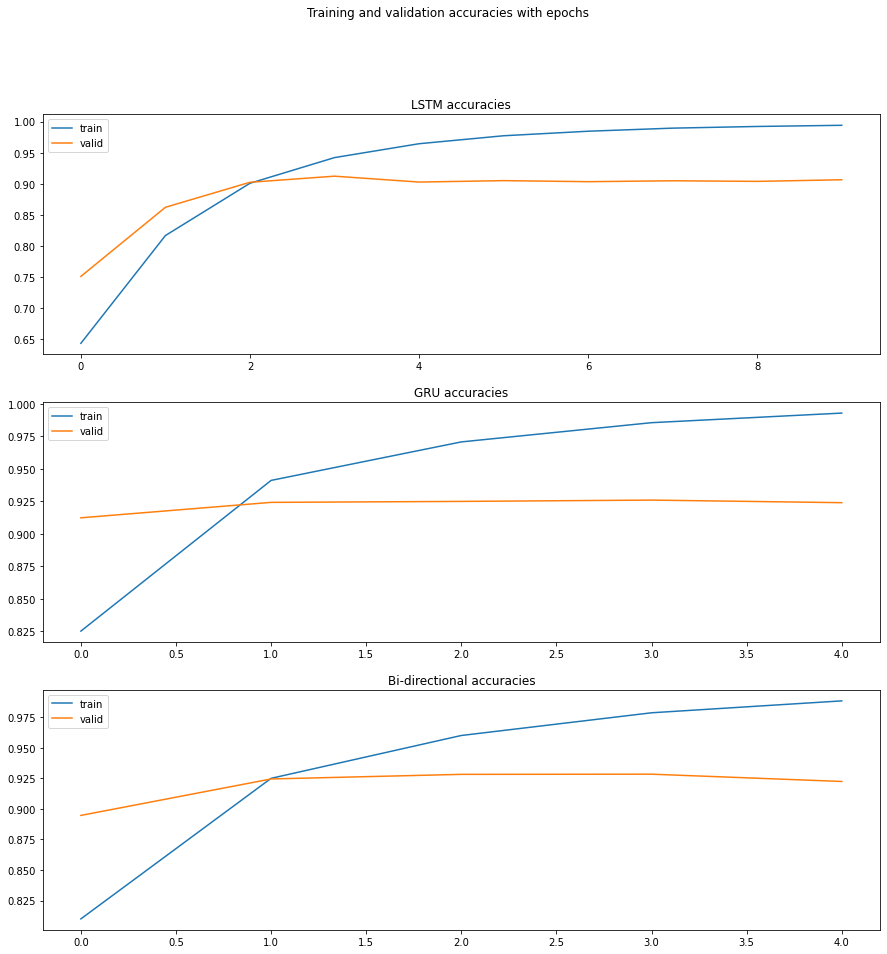

In [87]:
fig,(lstm,gru, bi_lstm)  = plt.subplots(nrows = 3,
                                        ncols = 1,
                                        figsize = (15,15))


# lstm
lstm.plot(lstm_history.history['accuracy'])
lstm.plot(lstm_history.history['val_accuracy'])
lstm.legend(['train', 'valid'])
lstm.set_title("LSTM accuracies")

# gru

gru.plot(gru_history.history['accuracy'])
gru.plot(gru_history.history['val_accuracy'])
gru.legend(['train', 'valid'])
gru.set_title("GRU accuracies")

# bi -lstm

bi_lstm.plot(bi_lstm_history.history['accuracy'])
bi_lstm.plot(bi_lstm_history.history['val_accuracy'])
bi_lstm.legend(['train', 'valid'])
bi_lstm.set_title("Bi-directional accuracies")

fig.suptitle("Training and validation accuracies with epochs")

fig.show()


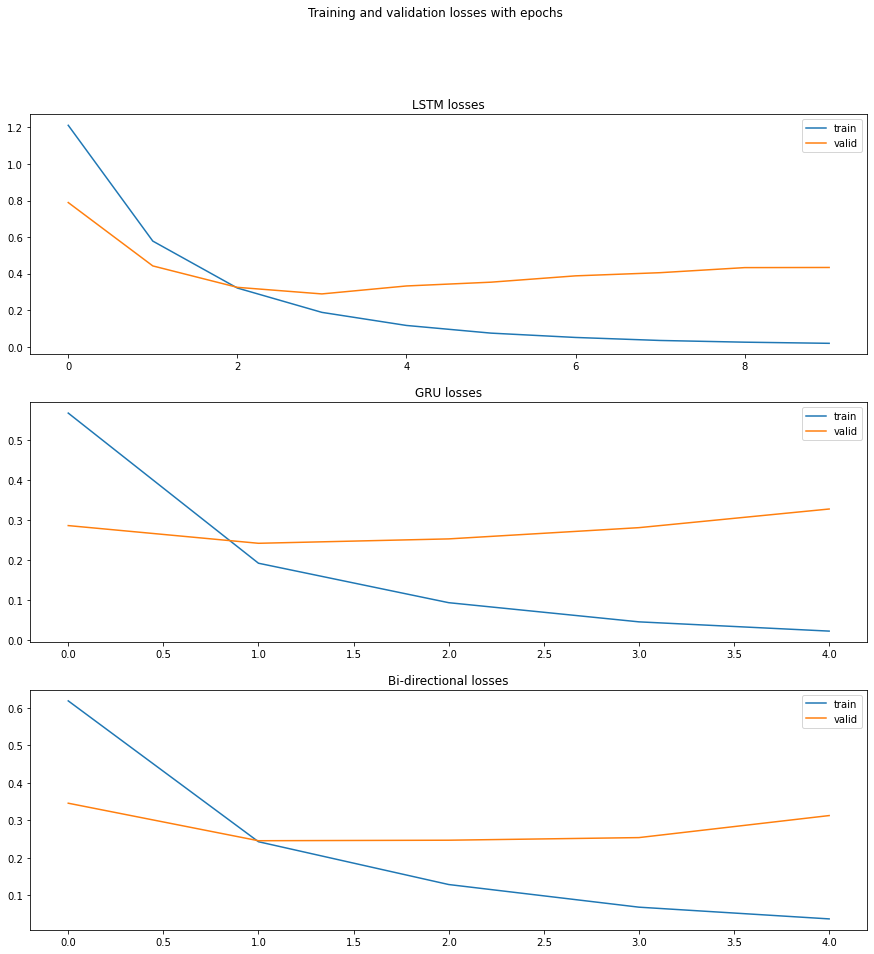

In [88]:
# loss
fig,(lstm,gru, bi_lstm)  = plt.subplots(nrows = 3,
                                        ncols = 1,
                                        figsize = (15,15))


# lstm
lstm.plot(lstm_history.history['loss'])
lstm.plot(lstm_history.history['val_loss'])
lstm.legend(['train', 'valid'])
lstm.set_title("LSTM losses")

# gru

gru.plot(gru_history.history['loss'])
gru.plot(gru_history.history['val_loss'])
gru.legend(['train', 'valid'])
gru.set_title("GRU losses")

# bi -lstm

bi_lstm.plot(bi_lstm_history.history['loss'])
bi_lstm.plot(bi_lstm_history.history['val_loss'])
bi_lstm.legend(['train', 'valid'])
bi_lstm.set_title("Bi-directional losses")

fig.suptitle("Training and validation losses with epochs")

fig.show()
